#                                         Company Attrition Analysis
  

#### STAGE -1- Importing and launching

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
dataset=pd.read_csv("general_data.csv")
dataset.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


In [4]:
dataset.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeID', 'Gender',
       'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'Over18', 'PercentSalaryHike', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

#### STAGE -2 - Data Preparation 

 1) Checking for missing data

In [91]:
dataset.isnull()
dataset=dataset.dropna()
print(dataset)

      Age Attrition     BusinessTravel              Department  \
0      51        No      Travel_Rarely                   Sales   
1      31       Yes  Travel_Frequently  Research & Development   
2      32        No  Travel_Frequently  Research & Development   
3      38        No         Non-Travel  Research & Development   
4      32        No      Travel_Rarely  Research & Development   
...   ...       ...                ...                     ...   
4404   29        No      Travel_Rarely                   Sales   
4405   42        No      Travel_Rarely  Research & Development   
4406   29        No      Travel_Rarely  Research & Development   
4407   25        No      Travel_Rarely  Research & Development   
4408   42        No      Travel_Rarely                   Sales   

      DistanceFromHome  Education EducationField  EmployeeCount  EmployeeID  \
0                    6          2  Life Sciences              1           1   
1                   10          1  Life Sciences 

No data entry is missing

2) Checking for duplicates and deleting if any

In [3]:
dataset.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4404    False
4405    False
4406    False
4407    False
4408    False
Length: 4382, dtype: bool

In [92]:
dataset.drop_duplicates()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4404,29,No,Travel_Rarely,Sales,4,3,Other,1,4405,Female,...,1.0,Y,18,8,0,6.0,2,6,1,5
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,4406,Female,...,3.0,Y,17,8,1,10.0,5,3,0,2
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,4407,Male,...,2.0,Y,15,8,0,10.0,2,3,0,2
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,4408,Male,...,0.0,Y,20,8,0,5.0,4,4,1,2


#### STAGE - 3 - Descriptive Univarite analysis

In [5]:
dataset.describe()

,Age,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
count,4382.000000,4382.000000,4382.000000,4382.0,4382.000000,4382.000000,4382.000000,4382.000000,4382.000000,4382.0,4382.000000,4382.000000,4382.000000,4382.000000,4382.000000,4382.000000
mean,36.933364,9.198996,2.912369,1.0,2207.804884,2.063898,65061.702419,2.693291,15.210634,8.0,0.794614,11.290278,2.798266,7.010497,2.191693,4.126198
std,9.137272,8.105396,1.024728,0.0,1271.688783,1.106115,47142.310175,2.497832,3.663007,0.0,0.852397,7.785717,1.289402,6.129351,3.224994,3.569674
min,18.000000,1.000000,1.000000,1.0,1.000000,1.000000,10090.000000,0.000000,11.000000,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,2.000000,1.0,1108.250000,1.000000,29110.000000,1.000000,12.000000,8.0,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000
50%,36.000000,7.000000,3.000000,1.0,2208.500000,2.000000,49190.000000,2.000000,14.000000,8.0,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000
75%,43.000000,14.000000,4.000000,1.0,3308.750000,3.000000,83790.000000,4.000000,18.000000,8.0,1.000000,15.000000,3.000000,9.000000,3.000000,7.000000
max,60.000000,29.000000,5.000000,1.0,4409.000000,5.000000,199990.000000,9.000000,25.000000,8.0,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000


1)Mean

In [6]:
left = dataset.groupby('Attrition')
left.mean()

,Age,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
Attrition,,,,,,,,,,,,,,,,
No,37.567038,9.232527,2.920044,1.0,2210.377482,2.069894,65684.209954,2.646451,15.157465,8.0,0.797661,11.868643,2.825129,7.367419,2.236062,4.367963
Yes,33.628369,9.024113,2.872340,1.0,2194.387234,2.032624,61814.950355,2.937589,15.487943,8.0,0.778723,8.273759,2.658156,5.148936,1.960284,2.865248


2) Median

In [7]:
left.median()

,Age,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
Attrition,,,,,,,,,,,,,,,,
No,36,7,3,1,2216,2,49300,2.0,14,8,1,10.0,3,6,1,3
Yes,32,7,3,1,2165,2,49080,1.0,14,8,1,7.0,3,3,1,2


3)Mode

In [4]:
data_y = dataset.loc[dataset['Attrition']=='Yes']
data_y[['Age','DistanceFromHome','Education','JobLevel','MonthlyIncome','PercentSalaryHike','TotalWorkingYears']].mode()

,Age,DistanceFromHome,Education,JobLevel,MonthlyIncome,PercentSalaryHike,TotalWorkingYears
0,31.0,2.0,3.0,2.0,25590,13.0,1.0
1,NaN,NaN,NaN,NaN,27410,NaN,NaN
2,NaN,NaN,NaN,NaN,27430,NaN,NaN
3,NaN,NaN,NaN,NaN,28860,NaN,NaN
4,NaN,NaN,NaN,NaN,55620,NaN,NaN


## Inference from the Measure of Central tendency analysis - 

  1) The average "Age" of the employee leaving is lesser than those staying. Also, mode(most common age) of the employees who are leaving is 31 , which are much less compared to the average age of employees(36.9). This can be because the younger
    employees want to explore more companies in their career and choose the best one.
    
    
  2) The average " Distance From Home,Education"  of the employees is almost equal, so it doesnot 
  have a major role in attrition rate.
  
  3) The average "Monthly Income, StockOptionLevel." of the employee leaving is also lesser than those staying. So, some employees maybe leaving the company due to lower salaries as well.
  
  4) The average "NumCompaniesWorked" is more and the "TrainingTimesLastYear, YearsAtCompany" are lesser for the employee leaving . This shows that the ones who are leaving have a general tendency/behaviour to change the companies.
  
  5) Some Strange observations are that the average "PercentSalaryHike" is more for the employees who are leaving and "TotalWorkingYears" are less for the the employees leaving.
  
  6) The average "YearsSinceLastPromotion" is lesser in the employees who are leaving. So, getting no promotion maybe one of the reasons for atrrition.

4)Variance and Std Deviation 

In [9]:
dataset[['Age','DistanceFromHome','Education','MonthlyIncome',
'NumCompaniesWorked', 'PercentSalaryHike','TotalWorkingYears', 'TrainingTimesLastYear',
'YearsAtCompany','YearsSinceLastPromotion', 'YearsWithCurrManager']].var()

Age                        8.348974e+01
DistanceFromHome           6.569744e+01
Education                  1.050068e+00
MonthlyIncome              2.222397e+09
NumCompaniesWorked         6.239165e+00
PercentSalaryHike          1.341762e+01
TotalWorkingYears          6.061739e+01
TrainingTimesLastYear      1.662558e+00
YearsAtCompany             3.756894e+01
YearsSinceLastPromotion    1.040059e+01
YearsWithCurrManager       1.274257e+01
dtype: float64

In [12]:
data_y = dataset.loc[dataset['Attrition']=='Yes']
data_n = dataset.loc[dataset['Attrition']=='No']
print(data_y.var())
#left the company

Age                        9.367988e+01
DistanceFromHome           6.014288e+01
Education                  1.029134e+00
EmployeeCount              0.000000e+00
EmployeeID                 1.613939e+06
JobLevel                   1.099786e+00
MonthlyIncome              2.015153e+09
NumCompaniesWorked         7.189281e+00
PercentSalaryHike          1.433260e+01
StandardHours              0.000000e+00
StockOptionLevel           7.350580e-01
TotalWorkingYears          5.150592e+01
TrainingTimesLastYear      1.336102e+00
YearsAtCompany             3.553318e+01
YearsSinceLastPromotion    9.970011e+00
YearsWithCurrManager       9.900850e+00
dtype: float64


In [11]:
#did not leave the company
print(data_n.var())

Age                        7.906440e+01
DistanceFromHome           6.677209e+01
Education                  1.053997e+00
EmployeeCount              0.000000e+00
EmployeeID                 1.618214e+06
JobLevel                   1.247290e+00
MonthlyIncome              2.260283e+09
NumCompaniesWorked         6.045263e+00
PercentSalaryHike          1.322846e+01
StandardHours              0.000000e+00
StockOptionLevel           7.250979e-01
TotalWorkingYears          6.029912e+01
TrainingTimesLastYear      1.721044e+00
YearsAtCompany             3.717699e+01
YearsSinceLastPromotion    1.047364e+01
YearsWithCurrManager       1.292686e+01
dtype: float64


## Inferences from Dispersion measures analysis-

1) The variance or deviation is seen less in the employees with no attrition. 

2) There is more consistency in some fields like Years since last promotion, years with current manager in the employees with no attrition.

6) Skewness

In [5]:
dataset[['Age','DistanceFromHome','Education','MonthlyIncome',
'NumCompaniesWorked', 'PercentSalaryHike','TotalWorkingYears', 'TrainingTimesLastYear',
'YearsAtCompany','YearsSinceLastPromotion', 'YearsWithCurrManager']].skew()

Age                        0.413048
DistanceFromHome           0.955517
Education                 -0.288977
MonthlyIncome              1.367457
NumCompaniesWorked         1.029174
PercentSalaryHike          0.819510
TotalWorkingYears          1.115419
TrainingTimesLastYear      0.551818
YearsAtCompany             1.764619
YearsSinceLastPromotion    1.980992
YearsWithCurrManager       0.834277
dtype: float64

In [13]:
data_y.skew() # attrition yes

Age                        0.714479
DistanceFromHome           0.957983
Education                 -0.217029
EmployeeCount              0.000000
EmployeeID                 0.001186
JobLevel                   1.053776
MonthlyIncome              1.536183
NumCompaniesWorked         0.864889
PercentSalaryHike          0.760011
StandardHours              0.000000
StockOptionLevel           0.956491
TotalWorkingYears          1.674396
TrainingTimesLastYear      0.416718
YearsAtCompany             2.659829
YearsSinceLastPromotion    2.195541
YearsWithCurrManager       1.017582
dtype: float64

In [14]:
data_n.skew() #attrition no

Age                        0.406885
DistanceFromHome           0.953779
Education                 -0.303039
EmployeeCount              0.000000
EmployeeID                -0.003028
JobLevel                   1.014550
MonthlyIncome              1.337715
NumCompaniesWorked         1.060904
PercentSalaryHike          0.830327
StandardHours              0.000000
StockOptionLevel           0.970007
TotalWorkingYears          1.065443
TrainingTimesLastYear      0.556424
YearsAtCompany             1.658986
YearsSinceLastPromotion    1.944890
YearsWithCurrManager       0.803398
dtype: float64

7)Kurtosis

In [14]:
dataset[['Age','DistanceFromHome','Education','MonthlyIncome',
'NumCompaniesWorked', 'PercentSalaryHike','TotalWorkingYears', 'TrainingTimesLastYear',
'YearsAtCompany','YearsSinceLastPromotion', 'YearsWithCurrManager']].kurt()

Age                       -0.405951
DistanceFromHome          -0.227045
Education                 -0.560569
MonthlyIncome              1.000232
NumCompaniesWorked         0.007287
PercentSalaryHike         -0.302638
TotalWorkingYears          0.912936
TrainingTimesLastYear      0.491149
YearsAtCompany             3.923864
YearsSinceLastPromotion    3.601761
YearsWithCurrManager       0.167949
dtype: float64

In [15]:
data_y.kurt() #yes attrition

Age                       -0.073144
DistanceFromHome          -0.041771
Education                 -0.616494
EmployeeCount              0.000000
EmployeeID                -1.212242
JobLevel                   0.632019
MonthlyIncome              1.658176
NumCompaniesWorked        -0.548699
PercentSalaryHike         -0.418411
StandardHours              0.000000
StockOptionLevel           0.251598
TotalWorkingYears          3.703175
TrainingTimesLastYear      0.960134
YearsAtCompany             9.456107
YearsSinceLastPromotion    4.775929
YearsWithCurrManager       0.242923
dtype: float64

In [16]:
data_n.kurt() #no attrition

Age                       -0.413967
DistanceFromHome          -0.261141
Education                 -0.547509
EmployeeCount              0.000000
EmployeeID                -1.197736
JobLevel                   0.353234
MonthlyIncome              0.895431
NumCompaniesWorked         0.135968
PercentSalaryHike         -0.280648
StandardHours              0.000000
StockOptionLevel           0.384976
TotalWorkingYears          0.672600
TrainingTimesLastYear      0.392538
YearsAtCompany             3.341164
YearsSinceLastPromotion    3.417934
YearsWithCurrManager       0.135562
dtype: float64

## Inferences from skweness and kurtosis - 

1)All the variables show postive skewness except Education, which shows negative skewness. 

2) While most of the variables are fairly symmetrical(-0.5:0.5) or moderatley skewed, some variables like monthly income,YearsSinceLastPromotion are highly skewed.

3)Overall, the age and diatance from home of the employees of the company are platykurtic and others are leptokurtic.

4)For the employess who have left the company(with attrition) Age,NumCompaniesWorked,PercentSalaryHike are platykurtic.


8)Outliers-

There’s no regression found while plotting Age, MonthlyIncome, TotalWorkingYears,
YearsAtCompany, etc., on a scatter plot


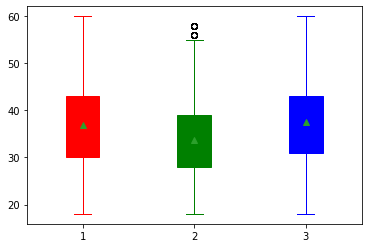

In [28]:
# Boxplot of overall age, age of employees with attrition and age of employees without attrition
data = [dataset.Age,data_y.Age,data_n.Age]
colors = ['red','green','blue']
fig, ax = plt.subplots()
box_dict = ax.boxplot(data, patch_artist=True,  showmeans=True)
for item in ['boxes', 'fliers', 'medians', 'means']:
    for sub_item,color in zip(box_dict[item], colors):
        plt.setp(sub_item, color=color)
# whiskers and caps have to be treated separately since there are two of each for each plot
for item in ['whiskers', 'caps']:
    for sub_items,color in zip(zip(box_dict[item][::2],box_dict[item][1::2]),colors):
        plt.setp(sub_items, color=color)

Overall, Age is normally distributed without any outliers. 

But, the age of the employees with attrition have 2 outliers and is near to  normal.

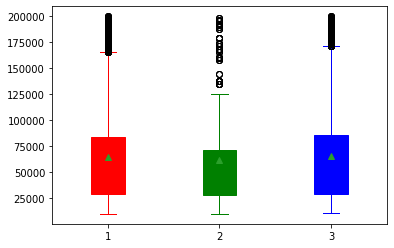

In [26]:
#plt.boxplot(dataset.MonthlyIncome)
data = [dataset.MonthlyIncome,data_y.MonthlyIncome,data_n.MonthlyIncome]
colors = ['red','green','blue']
fig, ax = plt.subplots()
box_dict = ax.boxplot(data, patch_artist=True,  showmeans=True)
for item in ['boxes', 'fliers', 'medians', 'means']:
    for sub_item,color in zip(box_dict[item], colors):
        plt.setp(sub_item, color=color)
# whiskers and caps have to be treated separately since there are two of each for each plot
for item in ['whiskers', 'caps']:
    for sub_items,color in zip(zip(box_dict[item][::2],box_dict[item][1::2]),colors):
        plt.setp(sub_items, color=color)

Overall, Monthly Income is Right skewed with many outliers.

The Monthly Income of the employees with attrition is right skewed with many outliers.

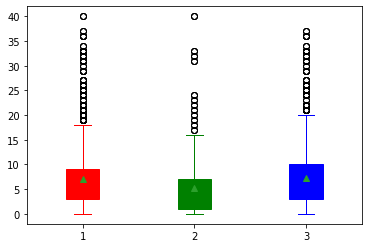

In [29]:
# Boxplot of overall YearsAtCompany, YearsAtCompanyof employees with attrition and YearsAtCompany of employees without attrition
data = [dataset.YearsAtCompany,data_y.YearsAtCompany,data_n.YearsAtCompany]
colors = ['red','green','blue']
fig, ax = plt.subplots()
box_dict = ax.boxplot(data, patch_artist=True,  showmeans=True)
for item in ['boxes', 'fliers', 'medians', 'means']:
    for sub_item,color in zip(box_dict[item], colors):
        plt.setp(sub_item, color=color)
# whiskers and caps have to be treated separately since there are two of each for each plot
for item in ['whiskers', 'caps']:
    for sub_items,color in zip(zip(box_dict[item][::2],box_dict[item][1::2]),colors):
        plt.setp(sub_items, color=color)

Years at company is also Right Skewed with several outliers observed. 

### Stage - 4: Visualisation

#### Age : Attrition

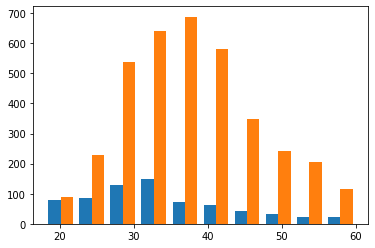

In [31]:
x=data_y.Age
y=data_n.Age
bins=10
plt.hist([x, y], bins, label=['YES', 'No'])
plt.show()

Most of the employees who left the company(with attrition) are younger. 

#### Business Travel:Attrition

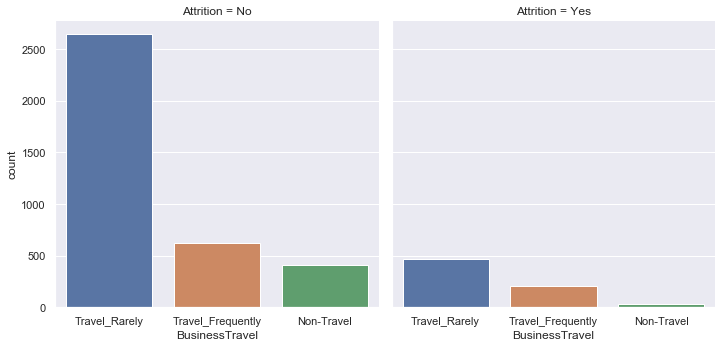

In [40]:
import seaborn as sns
sns.set(style="darkgrid")
g = sns.catplot(x="BusinessTravel", col="Attrition",
                data=dataset, kind="count"
                );

The employees who travel rarely have lesser attrition rates.

#### Department : Attrition

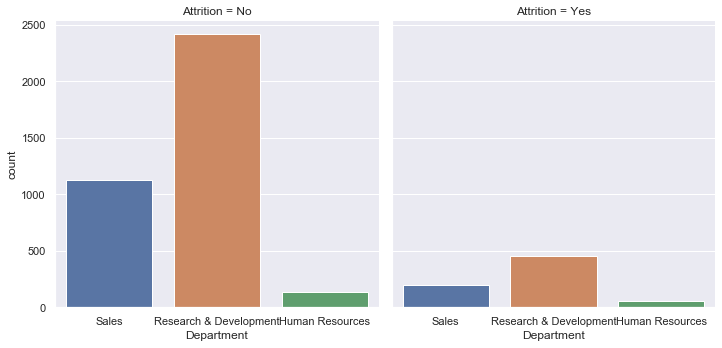

In [43]:
g = sns.catplot(x="Department", col="Attrition",
                data=dataset, kind="count"
                );

Most of the employees who stay as well as leave the company are from R&D department.

#### Attrition : Gender

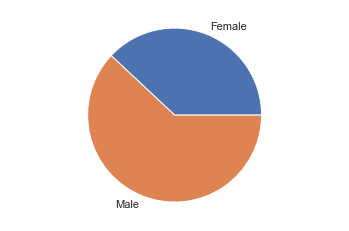

In [80]:
sums = dataset.Attrition.groupby(dataset.Gender).sum()
plt.axis('equal');
plt.pie(sums, labels=sums.index);
plt.show()

More percentage of males have left the company.

#### Attrition va Education Field

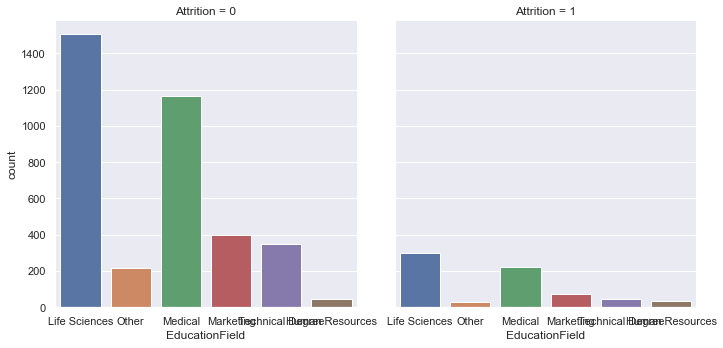

In [85]:
g = sns.catplot(x="EducationField", col="Attrition",
                data=dataset, kind="count"
                );

#### Attrition: Yrs at company

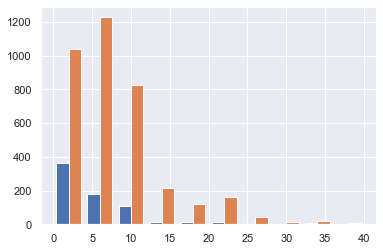

In [86]:
x=data_y.YearsAtCompany
y=data_n.YearsAtCompany
bins=10
plt.hist([x, y], bins, label=['YES', 'No'])
plt.show()

Employees who have spent more years at company have very less attrition rate. This means that the new employees have higher tendency of attrition.

## Step 5: Statistical tests : 
#### Man Whitney tests

#### Age: Attrition

In [94]:
from scipy.stats import mannwhitneyu
chitable = pd.crosstab(dataset.Age,dataset.Attrition)
print(chitable)

Attrition   No  Yes
Age                
18          12   11
19           9   18
20          15   18
21          21   18
22          32   15
23          30   12
24          57   21
25          60   18
26          80   36
27         134    9
28         102   40
29         149   53
30         152   27
31         152   54
32         149   33
33         137   36
34         204   27
35         203   30
36         187   18
37         131   17
38         167    6
39         107   18
40         153   15
41         101   18
42         131    6
43          89    6
44          81   18
45         117    6
46          87   12
47          63    8
48          51    6
49          66    6
50          75   15
51          51    6
52          44    9
53          51    6
54          54    0
55          57    9
56          32    9
57          12    0
58          27   15
59          30    0
60          15    0


In [95]:
stats,p = mannwhitneyu(chitable.No,chitable.Yes)
print(stats,p)

169.0 3.309751774702772e-11


H0 : There is no significant difference between age of employees who left the company(YES) and those who did not(NO).

H1 : There is a significant difference between age of employees who left the company(YES) and those who did not(NO).

As, p<0.05: reject H0.

So, There is a significant difference age of employees who left the company(YES) and those who did not(NO).

#### Attrition Vs Distance from Home

In [96]:
from scipy.stats import mannwhitneyu
chitable = pd.crosstab(dataset.DistanceFromHome,dataset.Attrition)
print(chitable)

Attrition          No  Yes
DistanceFromHome          
1                 528   94
2                 513  114
3                 219   29
4                 158   32
5                 162   30
6                 156   21
7                 204   48
8                 206   33
9                 218   35
10                198   60
11                 78    9
12                 44   15
13                 53    3
14                 59    3
15                 45   33
16                 80   15
17                 48   12
18                 63   15
19                 48   18
20                 65    9
21                 48    6
22                 48    9
23                 68   12
24                 75    9
25                 69    6
26                 72    3
27                 27    9
28                 56   11
29                 69   12


In [97]:
stats,p = mannwhitneyu(chitable.No,chitable.Yes)
print(stats,p)

59.0 9.615899502737067e-09


H0 : There is no significant difference between DistanceFromHome of employees who left the company(YES) and those who did not(NO).

H1 : There is a significant difference between DistanceFromHome of employees who left the company(YES) and those who did not(NO).

As, p<0.05: reject H0.

So, There is a significant difference in DistanceFromHome of employees who left the company(YES) and those who did not(NO).

### Attrition Vs Income

In [107]:
from scipy.stats import mannwhitneyu
chitable = pd.crosstab(dataset.MonthlyIncome,dataset.Attrition)
print(chitable)

stats,p = mannwhitneyu(chitable.No,chitable.Yes)
print(stats,p)

Attrition      No  Yes
MonthlyIncome         
10090           0    3
10510           3    0
10520           3    0
10810           3    0
10910           3    0
...            ..  ...
198590          0    3
199260          3    0
199430          3    0
199730          3    0
199990          3    0

[1349 rows x 2 columns]
284033.5 1.1844333434265164e-269


H0 : There is no significant difference between Income of employees who left the company(YES) and those who did not(NO).

H1 : There is a significant difference between Income of employees who left the company(YES) and those who did not(NO).

As, p<0.05: reject H0.

So, There is a significant difference in DistanceFromHome of employees who left the company(YES) and those who did not(NO).

#### Attrition vs PercentSalaryHike

In [100]:
from scipy.stats import mannwhitneyu
chitable = pd.crosstab(dataset.PercentSalaryHike,dataset.Attrition)
print(chitable)

Attrition           No  Yes
PercentSalaryHike          
11                 538   90
12                 502   89
13                 522  100
14                 510   87
15                 239   63
16                 202   29
17                 199   43
18                 227   39
19                 186   42
20                 138   27
21                 115   27
22                 138   30
23                  68   15
24                  54    9
25                  39   15


In [101]:
stats,p = mannwhitneyu(chitable.No,chitable.Yes)
print(stats,p)

16.5 3.701943462476957e-05


H0 : There is no significant difference between PercentSalaryHike of employees who left the company(YES) and those who did not(NO).

H1 : There is a significant difference between PercentSalaryHike of employees who left the company(YES) and those who did not(NO).

As, p<0.05: reject H0.

So, There is a significant difference in PercentSalaryHike of employees who left the company(YES) and those who did not(NO). Mostly the people who left the company have lesser PercentSalaryHike.

#### Attrition Vs TotalWorkingYears

In [102]:

from scipy.stats import mannwhitneyu
chitable = pd.crosstab(dataset.TotalWorkingYears,dataset.Attrition)
print(chitable)
stats,p = mannwhitneyu(chitable.No,chitable.Yes)
print(stats,p)


Attrition           No  Yes
TotalWorkingYears          
0.0                 18   14
1.0                122  119
2.0                 66   27
3.0                 99   27
4.0                152   36
5.0                214   48
6.0                307   65
7.0                189   52
8.0                259   47
9.0                255   30
10.0               527   75
11.0                85   21
12.0               129   15
13.0                99    9
14.0                81   12
15.0               105   15
16.0               102    9
17.0                90    9
18.0                68   12
19.0                57    9
20.0                82    6
21.0                99    3
22.0                56    6
23.0                60    6
24.0                45    9
25.0                39    3
26.0                39    3
27.0                21    0
28.0                38    3
29.0                30    0
30.0                21    0
31.0                24    3
32.0                27    0
33.0                

H0 : There is no significant difference between TotalWorkingYears of employees who left the company(YES) and those who did not(NO).

H1 : There is a significant difference between TotalWorkingYearsof employees who left the company(YES) and those who did not(NO).

As, p<0.05: reject H0.

So, There is a significant difference in TotalWorkingYears of employees who left the company(YES) and those who did not(NO).

## Step 6 – Statistical Tests (Separate T Test)

#### Age: Attrition


In [104]:
from scipy.stats import ttest_ind
chitable = pd.crosstab(dataset.Age,dataset.Attrition)
stat, p=ttest_ind(chitable.Yes,chitable.No)
print(stat, p)

-7.845365819094182 1.235956695100351e-11


H0 : There is no significant difference between age of employees who left the company(YES) and those who did not(NO).

H1 : There is a significant difference between age of employees who left the company(YES) and those who did not(NO).

As, p<0.05: reject H0.

So, There is a significant difference age of employees who left the company(YES) and those who did not(NO).

#### Distance FROM hOME VS Attrition

In [106]:
from scipy.stats import ttest_ind
chitable = pd.crosstab(dataset.DistanceFromHome,dataset.Attrition)
stat, p=ttest_ind(chitable.Yes,chitable.No)
print(stat, p)

-4.313988896088271 6.577504638016268e-05


H0 : There is no significant difference between DistanceFromHome of employees who left the company(YES) and those who did not(NO).

H1 : There is a significant difference between DistanceFromHome of employees who left the company(YES) and those who did not(NO).

As, p<0.05: reject H0.

So, There is a significant difference in DistanceFromHome of employees who left the company(YES) and those who did not(NO).

### MonthlyIncome vs Attrition

In [108]:
from scipy.stats import ttest_ind
chitable = pd.crosstab(dataset.MonthlyIncome,dataset.Attrition)
stat, p=ttest_ind(chitable.Yes,chitable.No)
print(stat, p)

-44.864116850298466 0.0


H0 : There is no significant difference between MonthlyIncome of employees who left the company(YES) and those who did not(NO).

H1 : There is a significant difference between MonthlyIncome of employees who left the company(YES) and those who did not(NO).

As, p<0.05: reject H0.

So, There is a significant difference in MonthlyIncome of employees who left the company(YES) and those who did not(NO).

## Stage 7- Correlation

In [109]:
## Convert category to numeric for Attrition: Yes-1 and NO-0
dataset["Attrition"] = dataset["Attrition"].astype('category')
dataset["Attrition"] = dataset["Attrition"].cat.codes


#### 1)Age

In [111]:
from scipy.stats import pearsonr
stats,p = pearsonr(dataset["Attrition"],dataset["Age"])
print(stats,p)

-0.15839867954096706 5.1265982193780794e-26


Age is negatively correlated to attrition. Also, as p-value is < 0.05, we reject H0. So, Age and Attrition are ccorreleted to each other. Hence, the yuonger employess have highr atrrition.

In [114]:
# 2)DistanceFromHome
stats,p = pearsonr(dataset["Attrition"],dataset["DistanceFromHome"])
print(stats,p)

-0.009448638515156243 0.5317715668019558


DistanceFromHome is very weakly negatively correlated to attrition rate. Also, as p-value is > 0.05, we accept H0, i.e DistanceFromHome and attrition rate are not much correlated.)

In [116]:
#3)Education
stats,p = pearsonr(dataset["Attrition"],dataset["Education"])
print(stats,p)

-0.017106307050278727 0.25757539308157945


Education is very weakly negatively correlated to attrition rate. Also, as p-value is > 0.05, we accept H0, i.e Education and attrition rate are not much correlated.

In [117]:
#4)PercentSalaryHike
stats,p = pearsonr(dataset["Attrition"],dataset["PercentSalaryHike"])
print(stats,p)

0.03315303713546665 0.028192446935106235


PercentSalaryHike is weakly positively correlated to attrition rate. Also, as p-value is < 0.05, we reject H0, i.e PercentSalaryHike and attrition rate are positively correlated.So, strangely the employees with more pecent salary hike have more chances of leaving the company.

In [118]:
#5) StockOptionLevel
stats,p = pearsonr(dataset["Attrition"],dataset["StockOptionLevel"])
print(stats,p)

-0.008164026684984324 0.588999635831226


StockOptionLevel is very weakly negatively correlated to attrition rate. Also, as p-value is > 0.05, we accept H0, i.e StockOptionLevel and attrition rate are not much correlated.

In [119]:
#6)TrainingTimesLastYear
stats,p = pearsonr(dataset["Attrition"],dataset["TrainingTimesLastYear"])
print(stats,p)

-0.04758573693081737 0.0016276603635477602


TrainingTimesLastYear is weakly negatively correlated to attrition rate. Also, as p-value is < 0.05, we reject H0, i.e TrainingTimesLastYear and attrition rate are negatively correlated. So, most of the employees who left the company had spent less training times last year.

In [120]:
#7)YearsAtCompany
stats,p = pearsonr(dataset["Attrition"],dataset["YearsAtCompany"])
print(stats,p)

-0.13300261842521538 9.476118084840815e-19


YearsAtCompany is negatively correlated to attrition rate. Also, as p-value is < 0.05, we reject H0, i.e YearsAtCompany and attrition rate are negatively correlated. So, most of the employees who left the company had spent less Years At Company.

In [121]:
#8)YearsSinceLastPromotion
stats,p = pearsonr(dataset["Attrition"],dataset["YearsSinceLastPromotion"])
print(stats,p)

-0.03142315056330995 0.03752293607395154


Years Since Last Promotion is negatively correlated to attrition rate. Also, as p-value is < 0.05, we reject H0, i.e Years Since Last Promotion and attrition rate are negatively correlated. So, most of the employees who left the company had less Years Since Last Promotion

In [122]:
#9)YearsWithCurrManager
stats,p = pearsonr(dataset["Attrition"],dataset["YearsWithCurrManager"])
print(stats,p)

-0.15469153690287274 7.105369646771178e-25


YearsWithCurrManager is weakly negatively correlated to attrition rate. Also, as p-value is < 0.05, we reject H0, i.e YearsAtCompany and attrition rate are negatively correlated. So, most of the employees who left the company had spent less Years With Curr Manager.

## Stage:8 - Statistical Test - Chi-square test

In [123]:
#1) BusinessTravel
from scipy.stats import chi2_contingency
chitable = pd.crosstab(dataset.Attrition,dataset.BusinessTravel)
stats,p,dof,expeted = chi2_contingency(chitable)
print(stats,p)

70.07594084831366 6.07019702736392e-16


H0 = There is no dependency between between BusinessTravel and Attrition rate.

So, p<0.05, reject H0.

So, there is a dependency between BusinessTravel and Attrition rate. Most of the people who travel rarely or are non travels have less attrition rates.

In [124]:
#2)Department
from scipy.stats import chi2_contingency
chitable = pd.crosstab(dataset.Attrition,dataset.Department)
stats,p,dof,expeted = chi2_contingency(chitable)
print(stats,p)

25.89432541916022 2.382970570769315e-06


H0 = There is no dependency between between Department and Attrition rate.

So, p<0.05, reject H0.

So, there is a dependency between Department and Attrition rate.

In [126]:
#3)EducationField
from scipy.stats import chi2_contingency
chitable = pd.crosstab(dataset.Attrition,dataset.EducationField)
stats,p,dof,expeted = chi2_contingency(chitable)
print(stats,p)

43.132860148900384 3.472896220587872e-08


H0 = There is no dependency between between EducationField and Attrition rate.

So, p<0.05, reject H0.

So, there is a dependency between EducationField and Attrition rate.

In [127]:
#4)Gender
from scipy.stats import chi2_contingency
chitable = pd.crosstab(dataset.Attrition,dataset.Gender)
stats,p,dof,expeted = chi2_contingency(chitable)
print(stats,p)

1.3825823839528295 0.23966176275638887


H0 = There is no dependency between gender and Attrition rate.

As, p>0.05, so, accept H0.

So, there is no dependency between gender and attrition rate.

In [128]:
#5)MaritalStatus
from scipy.stats import chi2_contingency
chitable = pd.crosstab(dataset.Attrition,dataset.MaritalStatus)
stats,p,dof,expeted = chi2_contingency(chitable)
print(stats,p)

133.85785802925156 8.573051828219379e-30


H0 = There is no dependency between between Marital Status and Attrition rate.

So, p<0.05, reject H0.

So, there is a dependency between Marital Status and Attrition rate.